<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/LogoUB.jpeg"></img>
<center>
<p>
<h1>Algorísmica Avançada</h1>
<h2>Pràctica 1 - Grafs </h2>
</center>
</p>
</div>

<div class="alert alert-info">
<center>
  <h1>Introducción</h1>
</center>

In [19]:
%matplotlib inline
import networkx as nx
from util import get_metro_graph, draw_metro_graph, get_path_subgraph
from test import test


A lo largo de esta práctica trabajaremos con el grafo generado a partir de la red de metro de Barcelona. En este grafo los nodos representan las estaciones y los ejes las vías que van de una estación a otra. Todos los ejes tienen tres atributos:

* Linea
* Color
* Distancia


In [20]:
G = get_metro_graph('csv/lineasmetro.csv')
print G.get_edge_data(*G.edges()[0])

{'color': 'darkblue', 'distance': '855270', 'line': 'L5'}


Por otro lado los nodos en su lugar únicamente almacenan (y se indexan) por el nombre de la estación.

In [21]:
print G.nodes()[0]

Camp de l'Arpa


In [22]:
print G["Vilapicina"]

{'Virrei Amat': {'color': 'darkblue', 'distance': '634010', 'line': 'L5'}, 'Horta': {'color': 'darkblue', 'distance': '688150', 'line': 'L5'}}


# util.py

En este archivo se os facilitan tres funciones que os permitiran cargar y visualizar la red de metro.
```python
G = get_metro_graph(location)
# Retorna un objeto nx.Graph que corresponde al grafo de la red de metro
# - location: ruta donde esta almacenado el archivo .csv

P = get_path_subgraph(P, path)
# Retorna un objeto tipo nx.Graph que almacena los nodos y los ejes correspondientes al
# camino que le pasamos por parametro
# - P: Grafo original
# - path: Lista de nodos sobre los que queremos crear el subgrafo

draw_metro_graph(G, figsize=(10,10))
# Dibuja el grafo que le pasemos por parametro.
# - G: Grafo de la red de metro
# - figsize: parametro opcional que nos permite definir el tamaño de la figura
```

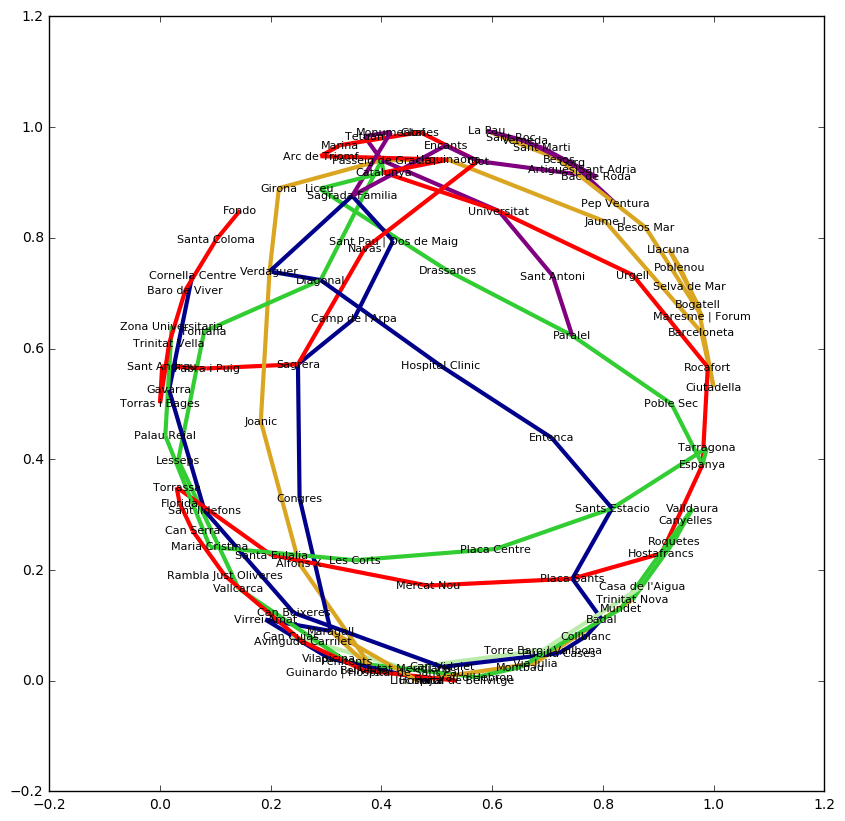

In [23]:
draw_metro_graph(G, figsize=(10,10))

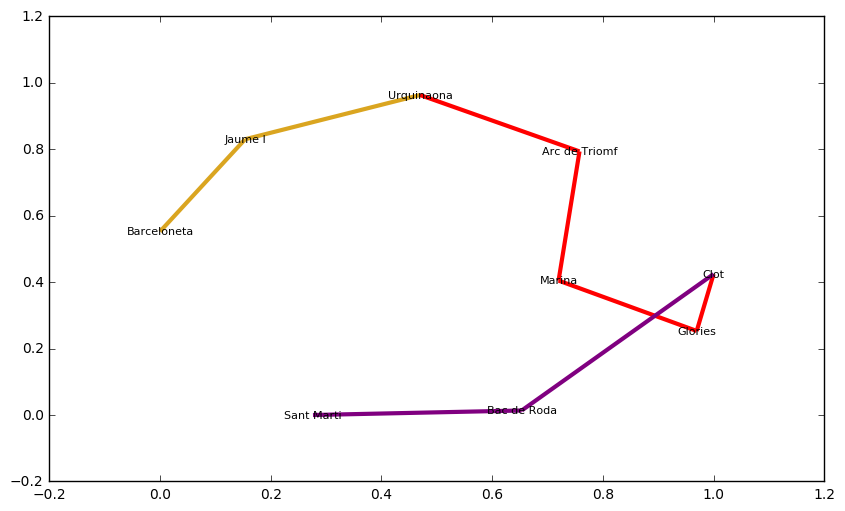

In [24]:
P = get_path_subgraph(G, [
        'Barceloneta',
        'Jaume I', 
        'Urquinaona', 
        'Arc de Triomf', 
        'Marina',
        'Glories',
        'Clot',
        'Bac de Roda',
        'Sant Marti'
    ])

draw_metro_graph(P)

# test.pyc

Este archivo contiene la función __test__ que servirá, a lo largo de la práctica para ir comprobando si los algoritmos implementados funcionan correctamente.

```python
    test(f_name, function)
    # Esta función hace un test de funcional y de forma de los algoritmos implementados.
    # - f_name: nombre de la funcion que queremos probar, a escoger: ['bfs', 'dijkstra', 'dijkstra2']
```

<div class="alert alert-info">
<center>
  <h1>Contenido</h1>
  </center><p>




<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1- Breadth First Search</p></h2>
  
  <p>
  En este primer apartado se propone la implementación del algoritmo _Breadth First Search_. Mediante este algoritmo pretendemos encontrar el camíno mínimo entre dos puntos del grafo.
  </p>
  <p>
  Se pide una implementación iterativa del algoritmo, en la que mediante una queue realizemos una exploración expansiva. Hay que tener en cuenta que la red de metro se construye como un grafo no dirigido, así que es importante controlar el hecho de que se visiten los nodos una sola vez.
  </p>
  
  <p>
  <a href="https://en.wikipedia.org/wiki/Breadth-first_search">Aquí</a> podeis encontrar mas detalles sobre la implementación y características de este algoritmo.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo (en el caso de esta practica la red de metro) que utilizaremos para buscar el camino. Debe de ser un objeto te tipo _networkx.Graph_.</li>
<li>__origen__: Este parámetro corresponde al indice de un nodo. En este caso, como indexamos los nodos con el nombre de las paradas de Metro, deberá ser un String _(e.g. 'Tetuan')_.</li>
<li>__destino__: El indice del nodo al que queremos llegar.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un diccionario que contiene los siguientes valores
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final __ambos nodos, inicio y final, han de estar incluidos en esta lista__.</li>
<li>__ _'expanded'_ __: El numero de nodos que se han visitado para encontrar la solución.</li>
<ul>

</p>

</div>

In [35]:
def bfs(G, origen, destino):
    temp=[(origen,[origen])]#We'll store here the current node and the path we have taken until now
    expanded=[] #Here, we will store the visited nodes in order to not get stuck in infinite loops
    while temp: #If we still have nodes to visit, we can go on
        curPos,path=temp.pop(0) #As we are implementing BFS, we have to use a queue, so we take the first value
        if curPos==destino: #If the node we are on is the destination, we can return the path
            return {'path' : path,'expanded' : len(expanded)}
        if curPos not in expanded: #We check if we haven't visited our current node yet
            expanded.append(curPos) #We add the node to our expanded list
            for n in G.neighbors(curPos): #Every neighbor 
                temp.append((n,path+[n]))
    
print bfs(G, "Horta", "Mundet")

{'path': ['Horta', 'Vilapicina', 'Virrei Amat', 'Maragall', 'Llucmajor', 'Via Julia', 'Trinitat Nova', 'Roquetes', 'Canyelles', 'Valldaura', 'Mundet'], 'expanded': 44}


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Test </h3></p> </center> </div>

In [36]:
test('bfs', bfs)

== Test v0.3 ==
#1. Test de forma [OK]
#2. Test funcional
* Expanded [OK]
* Path [OK]


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios </h3></p> </center> </div>

# Implementación
En este ejercicio, trabajare con dos listas. En una, guardaré los nodos que vaya visitando, asi como el camino que llevo hasta ese momento; en la otra, guardaré los nodos que ya he visitado para evitar bucles.

La lista temp funcionara como una queue, añadiendo elementos al final y cogiendo el primero.

Para evitar problemas con nodos inalcanzables (que nos dejarian temp vacia), comprobaremos a cada iteración si aun nos quedan elementos en ella. En caso de que todos los nodos fueran accesibles, podriamos hacer un bucle infinito (while 1).

Podriamos evitarnos añadir nodos que ya esten en expanded, pero dado que tendriamos que comprobarlo a cada iteracion, la ganancia es minima.

# Complejidad
Puesto que temp sera utilizado como una queue, consideraremos que su complejidad es la de O(n) para coger un elemento y O(1) para añadirlo.

La complejidad de comprobar si hemos llegado al destino es O(1), ya que es una mera comparacion.

Comprobar si un elemento esta en expanded tendra complejidad O(n), ya que debera mirar todos los elementos para comprobar si esta. En el peor de los casos (el nodo no esta) debera mirar todos.

Dado que la mayoria de estaciones tienen entre 1 y 5 vecinos a lo sumo, consideraremos que añadirlos a temp tendra coste constante O(1), ya que no dependera del numero de nodos de nuestro grafo

El bucle se repetira, en el peor de los casos, n veces, dado que debera visitar todos los nodos, por tanto, debemos multiplicar el coste de todas las acciones dentro del bucle por las veces que se repite el bucle.

O(n) x (O(n) + O(1) + O(1) ) = O(n) x O(n) = O(n²)

<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>2- Dijkstra</p></h2>
  
  <p>
 En esta segunda parte de la práctica se propone que hagáis dos implementaciones del algoritmo <a href="https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm">Dijkstra</a>. 
 <ul><li>
 **dijkstra1:** La primera consiste en el algoritmo común en el que tendremos en cuenta las distancias definidas en los edges. 
 </li><li>
 **dijkstra2:** La segunda implementación es simplemente una ampliación del primer algoritmo en el que añadiremos una penalización por cambio de línea.</li>
 </ul>
</p>
<h3> Ejemplo _dijkstra2_</h3>
<p>
Para ilustrar lo que se pide en la práctica veamos como se calcularía el valor de **C** y **D** en el siguiente gráfico:
</p>


<p><center><img src='img/e1.png'></img></center></p>


<p>
<ul><li>
**[C]** Calculamos V(B) como V(A) + d([A,B]), calculamos V(C) como V(B) + d([B,C]), ya hemos acabado.
</li>
<li>
**[D]** Calculamos V(B) como V(A) + d([A,B]), calculamos V(D) como V(B) + d([B,D]), como [A,B] es linea azul y [B,D] es linea verde, añadimos una penalización por el transbordo a la que llamamos **P**. Por lo tanto, al final obtenemos que V(D) = V(B) + d([B,C]) + P
</li>
</ul>

<br>
-**V(X)**: Valor de X
<br>
-**d([X,Y])**: Distancia de X a Y
<br>
-**P**: Penalización por transbordo

</p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo (en el caso de esta practica la red de metro) que utilizaremos para buscar el camino. Debe de ser un objeto te tipo _networkx.Graph_.</li>
<li>__origen__: Este parámetro corresponde al indice de un nodo. En este caso, como indexamos los nodos con el nombre de las paradas de Metro, deberá ser un String _(e.g. 'Tetuan')_.</li>
<li>__destino__: El indice del nodo al que queremos llegar.</li>
<li>__infinity=*(int)*__: Parámetro opcional en el que definimos que número nos va bien para utilizar como infinito en el momento de inicializar los pesos de los nodos.</li>
<li>__penalty=*(int)*__: (_Solo necesario para dijkstra2)_ Es un numero entero que corresponde a la penalización que aplicamos al valor de un nodo cuando hay cambio de línea.
</ul>
<br>
<h3>OUTPUT</h3>
El output de una función es un diccionario que contiene los siguientes valores
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final __ambos nodos, inicio y final, han de estar incluidos en esta lista__.</li>
<li>__ _'expanded'_ __: El número de nodos que se han visitado para encontrar la solución.</li>
<li>__ _'distance'_ __: La distancia del camino mínimo desde el origen hasta el destino (es decir, el valor del nodo destino).
<ul>

</p>
</div>


In [27]:
def dijkstra(G, origen, destino, infinity=99999999999):
    expanded=[]
    nx.set_node_attributes(G,'cost',infinity)
    nx.set_node_attributes(G,'antecesor',"")
    G.node[origen]['cost'] = 0
    temp=[(origen,G.node[origen]['cost'])]
    #We will store the minimal cost in order to check if current distance is the minimal we can get
    minCost=infinity
    while temp:
        #Picks the node with minimal distance
        curPos,cost=min(temp, key = lambda temp: temp[1])
        #If the cost of the minimal node is greater than the current minimum, we have already our solution
        if(cost>G.node[destino]['cost']):
            break
        #Removes current node from our list
        temp.remove((curPos,cost))
        #Adds current node to our expanded list
        #It's not necessary to our agorithm, but we need it to know how many nodes we have expanded
        if curPos not in expanded:
            expanded.append(curPos)
        #Adds all its neighbors to our list and updates their distances if the current distance is greater than the new one
        for n in G.neighbors(curPos):
            if(G.node[n]['cost']>cost+int(G[curPos][n]['distance'])):
                G.node[n]['antecesor']=curPos
                G.node[n]['cost']=cost+int(G[curPos][n]['distance'])
                temp.append((n,G.node[n]['cost'])) 
    #Creates a path with the antecesors of each node
    sol=[destino]
    curPos=destino
    while(G.node[curPos]['antecesor']!=''):
        sol.append(G.node[curPos]['antecesor'])
        curPos=G.node[curPos]['antecesor']
    #We are adding them in reverse, so we have to reverse the path
    sol.reverse()
    return {'path': sol,'expanded': len(expanded),'distance': cost}

dijkstra(G,'Horta','Mundet')

{'distance': 8716960,
 'expanded': 67,
 'path': ['Horta',
  'Vilapicina',
  'Virrei Amat',
  'Maragall',
  'Llucmajor',
  'Via Julia',
  'Trinitat Nova',
  'Roquetes',
  'Canyelles',
  'Valldaura',
  'Mundet']}

In [28]:
def dijkstra2(G, origen, destino, penalty=5000000, infinity=99999999999):
    expanded=[]
    nx.set_node_attributes(G,'cost',infinity)
    nx.set_node_attributes(G,'antecesor',"")
    G.node[origen]['cost'] = 0
    temp=[(origen,G.node[origen]['cost'])]
    minCost=infinity
    while temp:
        curPos,cost=min(temp, key = lambda temp: temp[1])
        if(cost>G.node[destino]['cost']):
            break
        temp.remove((curPos,cost))
        if curPos not in expanded:
            expanded.append(curPos)
        for n in G.neighbors(curPos):
            #The only difference with dijkstra is that, if the current line we are in is different from the new one
            #we will add a penalty
            newCost=cost+int(G[curPos][n]['distance'])
            if(curPos!=origen):
                newCost+=penalty*(G.get_edge_data(curPos,n)['line']!=G.get_edge_data(G.node[curPos]['antecesor'],curPos)['line'])
            if(G.node[n]['cost']>newCost):
                G.node[n]['antecesor']=curPos
                G.node[n]['cost']=newCost
                temp.append((n,G.node[n]['cost'])) 
    sol=[destino]
    curPos=destino
    while(G.node[curPos]['antecesor']!=''):
        sol.append(G.node[curPos]['antecesor'])
        curPos=G.node[curPos]['antecesor']
    sol.reverse()
    return {'path': sol,'expanded': len(expanded),'distance': cost}
        
dijkstra2(G,'Horta','Mundet')

{'distance': 17111420,
 'expanded': 75,
 'path': ['Horta',
  'Vilapicina',
  'Virrei Amat',
  'Maragall',
  'Congres',
  'Sagrera',
  "Camp de l'Arpa",
  'Sant Pau | Dos de Maig',
  'Sagrada Familia',
  'Verdaguer',
  'Diagonal',
  'Fontana',
  'Lesseps',
  'Vallcarca',
  'Penitents',
  "Vall d'Hebron",
  'Montbau',
  'Mundet']}

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Test </h3></p> </center> </div>

In [29]:
test('dijkstra', dijkstra)

== Test v0.3 ==
#1. Test de forma [OK]
#2. Test funcional [OK]


In [30]:
test('dijkstra2', dijkstra2)

== Test v0.3 ==
#1. Test de forma [OK]
#2. Test funcional [OK]


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios </h3></p> </center> </div>

# Implementación
Dado que la implementacion de dijkstra y dijkstra2 es muy similar, explicare su implementacion al mismo tiempo, comentando las diferencias al final.

El algoritmo funcionara de forma identica al de bfs, con la diferencia que ahora tendremos en cuenta las distancias entre nodos, de manera que utlizaremos una priority queue en vez de una queue, para poder elegir en cada momento el nodo con menor distancia.

Para poder trabajar de forma mas comoda, añadiremos a los nodos un nuevo atributo, 'cost', que guardara el coste/distancia minima para llegar hasta el desde el nodo origen, asi como el atributo 'antecesor', que guardara el nodo que nos permite llegar hasta el con coste minimo.

minCost guardara en todo momento cual es la distancia para llegar desde el origen hasta el destino, para evitar tener que buuscarla a cada iteracion. Dado que buscamos la distancia minima, en cuanto todos los nodos no visitados esten a una distancia mayor que minCost, pararemos la ejecucion y devolveremos el camino y distancia minimos.

En cuanto a los costes para llegar del origen a los nodos, se iran actualizando a cada iteracion, cambiando su valor si encontramos que el nuevo es inferior.

Una vez se cumple la codicion de parada, crearemos el camino solucion utilizando los antecesores de cada nodo, empezando en destino y terminando en cuanto encontremos un nodo sin antecesor (origen).

En lo que respecta a dijkstra2, comprobaremos para cada nodo vecino si la linea en la cual nos moveremos es la misma que la actual. En caso contrario, añadiremos la penalizacion al coste de ir a ese nuevo nodo. 

# Complejidad
La cmplejidad tanto en dijkstra como en dijkstra2 sera la misma, asi que la calcularemos una sola vez.

Dado que utilizamos una lista como priority queue, el coste de coger el elemento de coste minimo sera O(2n), ya que tendremos coste O(n) para encontrar el nodo minimo y O(n) para sacarlo de la lista. Aun asi, O(2n)=O(n).

La complejidad de comprobar si la distancia del nodo minimo es superior o no a la del destino es O(1), ya que es una mera comparacion.

Comprobar si un elemento esta en expanded tendra complejidad O(n), ya que debera mirar todos los elementos para comprobar si esta. En el peor de los casos (el nodo no esta) debera mirar todos.

Dado que la mayoria de estaciones tienen entre 1 y 5 vecinos a lo sumo, consideraremos que añadirlos a temp tendra coste constante O(1), ya que no dependera del numero de nodos de nuestro grafo

El bucle se repetira, en el peor de los casos, n veces, dado que debera visitar todos los nodos, por tanto, debemos multiplicar el coste de todas las acciones dentro del bucle por las veces que se repite el bucle.

O(n) x (O(n) + O(1) + O(1) ) = O(n) x O(n) = O(n²)

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>
<p>
La entrega de esta práctica tiene como fecha límite el **domingo, 13 de noviembre de 2016 a las 23:55**. En el campus virtual deberéis subir este fichero con las funciones implementadas y la secciones de comentarios debidamente rellenadas. Si queréis también podéis añadir tests extras que den soporte a los comentarios realizados.
</p>